# Question 1

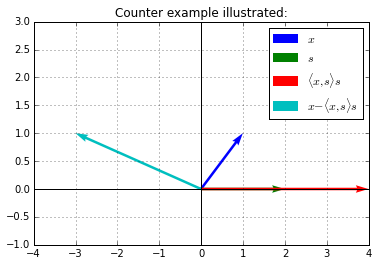

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure()
ax = plt.gca()
x = ax.quiver([0],[0],[1],[1],angles='xy',scale_units='xy',scale=1, color = 'b')
ax.quiver([0],[0],[2],[0],angles='xy',scale_units='xy',scale=1,  color = 'g')
ax.quiver([0],[0],[4],[0],angles='xy',scale_units='xy',scale=1, color = 'r')
ax.quiver([0],[0],[-3],[1],angles='xy',scale_units='xy',scale=1, color = 'c')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_xlim(-4,4)
ax.set_ylim(-1,3)
b_patch = mpatches.Patch(color='b', label=r'$x$')
g_patch = mpatches.Patch(color='g', label=r'$s$')
r_patch = mpatches.Patch(color='r', label=r'$\langle x, s \rangle s$')
c_patch = mpatches.Patch(color='c', label=r'$x - \langle x, s \rangle s$')
plt.legend(handles=[b_patch,g_patch,r_patch,c_patch])
plt.title('Counter example illustrated:')
plt.gcf()
plt.savefig('q1_a.jpg')

# Questions 4

In [1]:
import os.path
import math
import matplotlib.pyplot as plt
import numpy as np

plt.close("all")
plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'

dataset = np.loadtxt("seeds_dataset.txt")
raw_data_T = dataset[:,:-1]
labels = dataset[:,-1]

def ind_x_eq_val(x, val):
    return np.where(x==val)[0]

In [2]:
# Center the columns 
centered_data_T = raw_data_T - raw_data_T.mean(axis=0)
# Normalize each column (divide by maximum value)
data_T = centered_data_T  / np.abs(centered_data_T).max(axis=0)
data_T.shape

(210, 7)

In [3]:
# Project onto two first principal components
### INSERT CODE HERE ###

from sklearn.decomposition import PCA

## Extract subgroups (1, 2, 3 in labels)

pca = PCA(n_components=7)
pca.fit(data_T)
pcs = {}
for i in range(1,4):
    key = 'projections_' + str(i)
    print key
    subgroup = data_T[labels == i] 
    pcs[key] = pca.transform(subgroup)

print pcs['projections_1'].shape, pcs['projections_2'].shape, pcs['projections_3'].shape, 

projections_1
projections_2
projections_3
(70, 7) (70, 7) (70, 7)


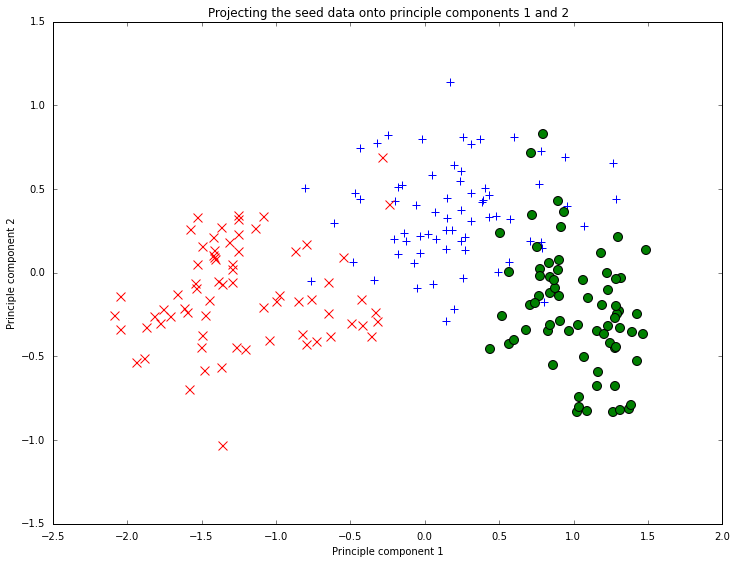

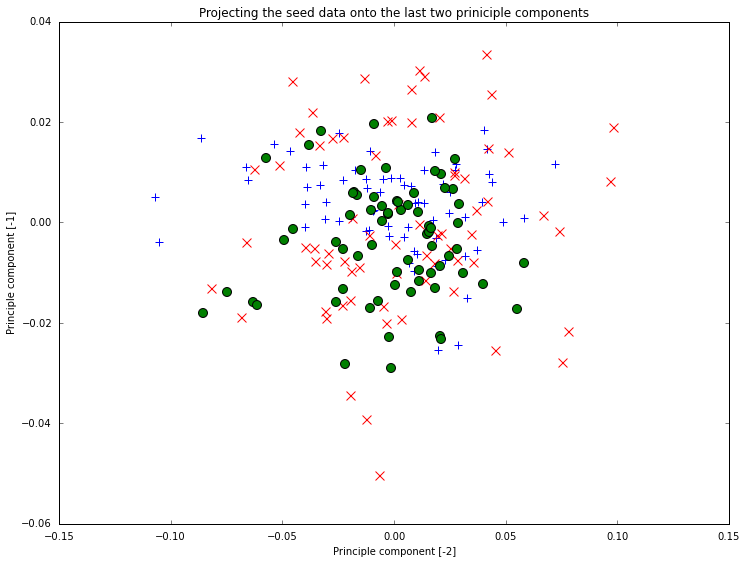

In [6]:
%matplotlib inline
fig_a = plt.figure(figsize=(12, 9))  
plt.scatter(pcs['projections_1'][:,0], pcs['projections_1'][:,1], s=80, c="blue", marker='+')
plt.scatter(pcs['projections_2'][:,0], pcs['projections_2'][:,1], s=80, c="red", marker='x')
plt.scatter(pcs['projections_3'][:,0], pcs['projections_3'][:,1], s=80, c="green", marker='o')
plt.title("Projecting the seed data onto principle components 1 and 2")
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')
plt.gcf()
plt.savefig('q4_ai.jpg')

# Project onto two last principal components
### INSERT CODE HERE ###

fig_b = plt.figure(figsize=(12, 9))  
plt.scatter(pcs['projections_1'][:,-2], pcs['projections_1'][:,-1], s=80, c="blue", marker='+')
plt.scatter(pcs['projections_2'][:,-2], pcs['projections_2'][:,-1], s=80, c="red", marker='x')
plt.scatter(pcs['projections_3'][:,-2], pcs['projections_3'][:,-1], s=80, c="green", marker='o')
plt.title("Projecting the seed data onto the last two priniciple components")
plt.xlabel('Principle component [-2]')
plt.ylabel('Principle component [-1]')
plt.gcf()
plt.savefig('q4_aii.jpg')
